In [2]:
*| echo: false
*| output: false
set scheme white2
color_style tableau
use data_slides/hotels-vienna.dta, clear
label var stars "Stars Rating N Stars"

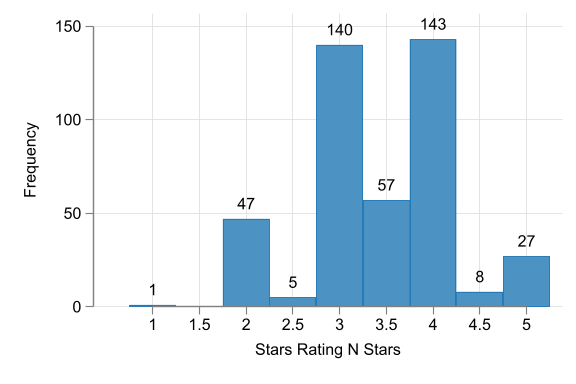

In [3]:
*| echo: true
*| code-fold: true
*| fig-cap: Absolute frequency

qui:histogram stars, d frequency ///
    scale(1.5) addlabels xlabel(1(.5)5)

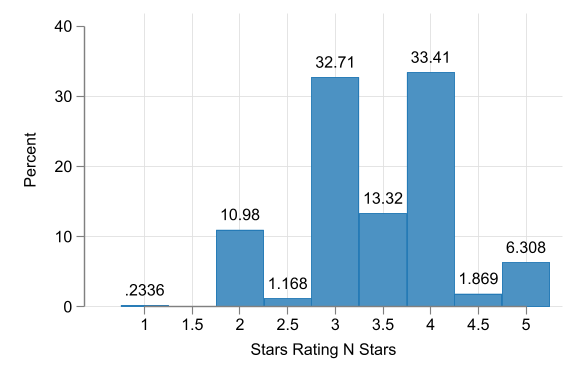

In [4]:
*| echo: true
*| code-fold: true
*| fig-cap: Relative frequency
qui:histogram stars, d percent ///
    scale(1.5) addlabels xlabel(1(.5)5)

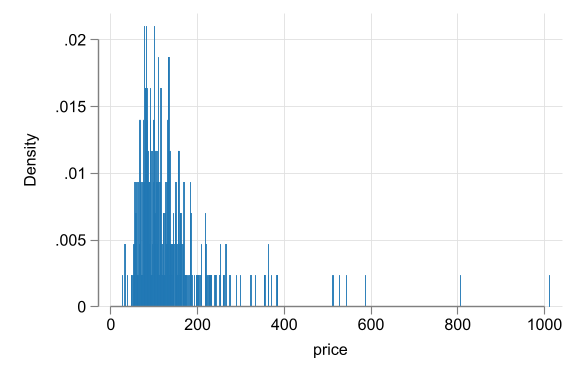

In [5]:
*| echo: true
*| code-fold: true
*| fig-cap: Price Distribution  1$ bin
qui:histogram price, d  ///
    scale(1.5) width(1) 

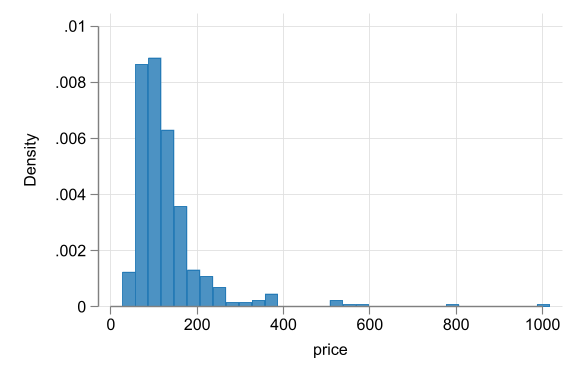

In [6]:
*| echo: true
*| code-fold: true
*| fig-cap: Price Distribution 30$ bin
qui:histogram price,  ///
    scale(1.5) width(30)

In [7]:
*| echo: true
*| code-fold: true
*| fig-cap: Default Bandwidth
 *| kdensity price,   ///
    scale(1.5)  note("") bw(10)

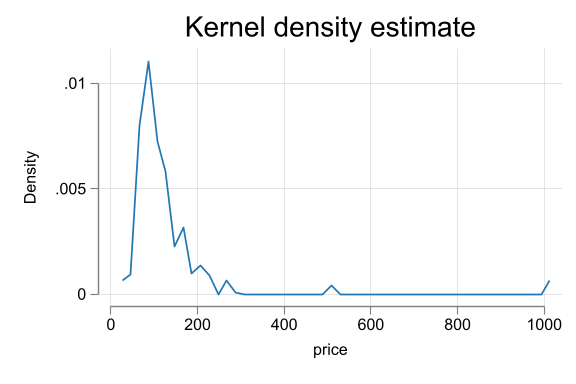

In [8]:
*| echo: true
*| code-fold: true
*| fig-cap: Bandwidth of 1
 kdensity price,   ///
    scale(1.5)  note("") bw(1)

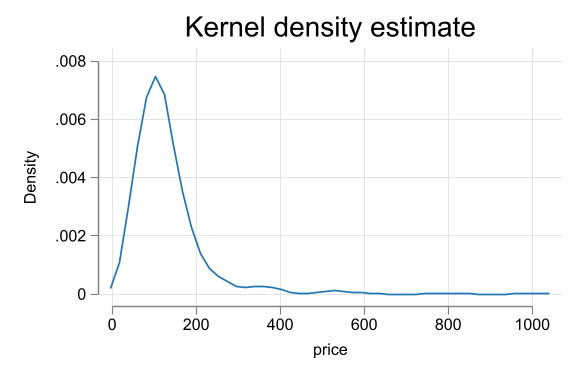

In [9]:
*| echo: true
*| code-fold: true
*| fig-cap: Bandwidth of 30
 kdensity price,   ///
    scale(1.5)  note("") bw(30)

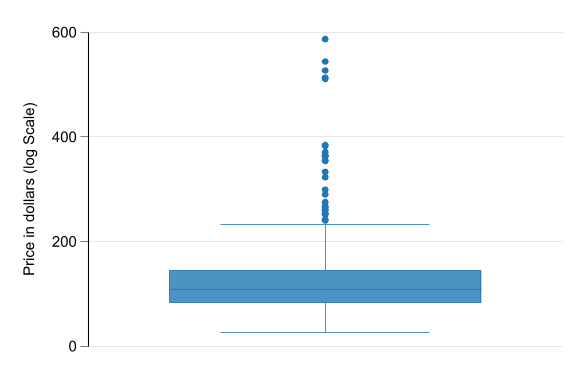

In [10]:
*| echo: true
*| code-fold: true
*| fig-cap: "Box Plot: Viena prices"
*| fig-pos: center

use data_slides/hotels-vienna.dta, clear
qui:drop if price>800
graph box price, scale(1.4)  ///
  ytitle("Price in dollars (log Scale)") 

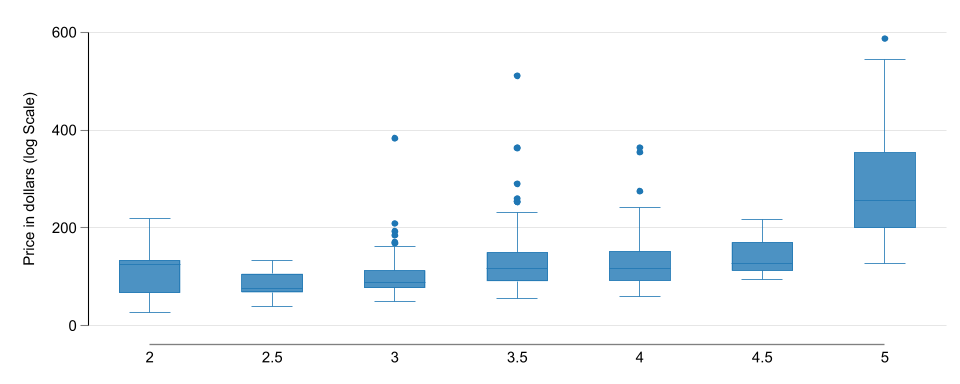

In [11]:
*| echo: true
*| code-fold: true
*| fig-cap: "Box Plot: Viena prices"
*| fig-pos: center

use data_slides/hotels-vienna.dta, clear
qui:drop if price>800
 graph box price if stars>1, scale(1.4) ///
  over(stars)  xsize(10) ysize(4) ///
  ytitle("Price in dollars (log Scale)")  

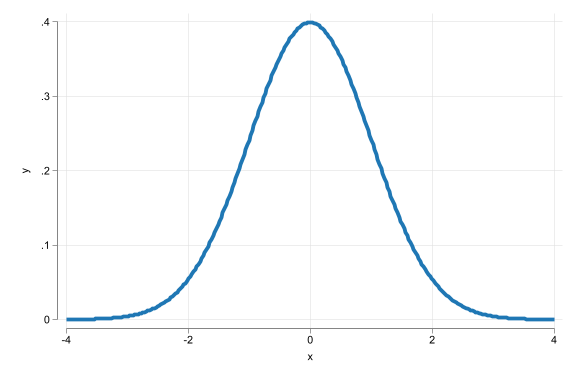

In [12]:
*| echo: false
*| fig-pos: center

twoway function y = normalden(x), range(-4 4) lw(1) 

Number of observations (_N) was 0, now 10,000.
(bin=40, start=.79124224, width=1.5880267)


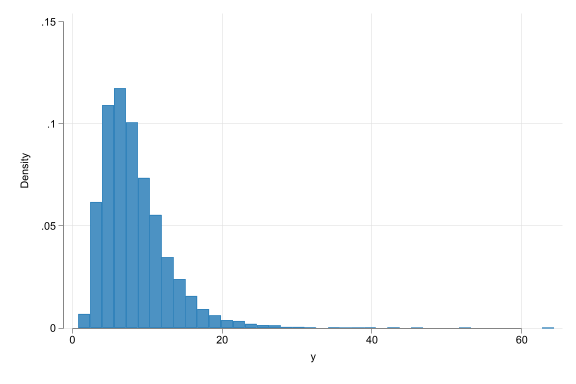

In [13]:
*| echo: false
*| fig-pos: center
clear 
set obs 10000
gen y = exp(rnormal()/2+2)
histogram y

(395 observations deleted)


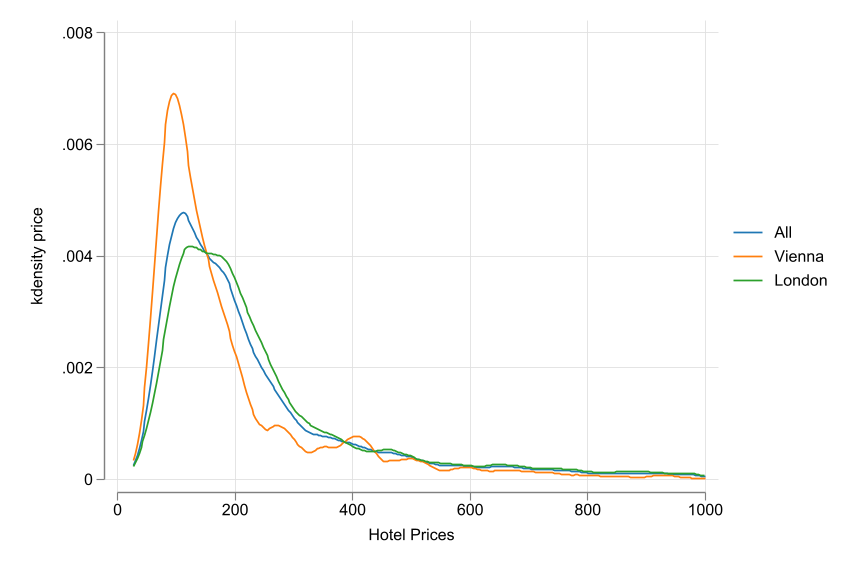

In [14]:
*| echo = true
*| fig-align = center
*| code-fold = true

qui: use "data_slides/hotels-vienna-london", clear
drop if price > 1000
set scheme white2
color_style tableau
two (kdensity price) ///
(kdensity price if city=="Vienna") ///
(kdensity price if city=="London"), ///
legend(order(1 "All" 2 "Vienna" 3 "London")) ///
xtitle("Hotel Prices") xsize(9) ysize(6)

In [15]:
*| echo: false
*| output: false

use "data_slides\wb-mx-management.dta", clear
keep if wave == 2013
keep if inrange(emp_firm,100,5000)
recode emp_firm (100/199=1 "Small") (200/999=2 "Medium") (1000/5000=3 "Large"), gen(firm_size)

(0 observations deleted)
(35 observations deleted)
(300 differences between emp_firm and firm_size)


In [16]:
*| echo: false
*| output: asis

qui: estpost tabstat management, by(firm_size) stat(mean median sd)  

esttab, cells("mean(fmt(2)) p50(fmt(2)) sd(fmt(2))") label ///
  nonumber nomtitle md 



|                      |         mean |          p50 |           sd |
| -------------------- | :----------: | :----------: | :----------: |
| Small                |         2.68 |         2.78 |         0.51 |
| Medium               |         2.94 |         3.00 |         0.62 |
| Large                |         3.19 |         3.08 |         0.55 |
| Total                |         2.94 |         2.94 |         0.60 |
| Observations         |          300 |              |              |



In [17]:
*| echo: false
*| output: asis
qui: estpost tab lean1 firm_size

esttab , cell(colpct(fmt(2))) unstack nonumber collab(none) nomtitle noline md



|              |        Small |       Medium |        Large |        Total |
| ------------ | :----------: | :----------: | :----------: | :----------: |
| 1            |        19.44 |         8.33 |         6.94 |        10.67 |
| 2            |        37.50 |        28.85 |        26.39 |        30.33 |
| 3            |        31.94 |        35.90 |        30.56 |        33.67 |
| 4            |        11.11 |        21.79 |        27.78 |        20.67 |
| 5            |         0.00 |         5.13 |         8.33 |         4.67 |
| Total        |       100.00 |       100.00 |       100.00 |       100.00 |
| *N*          |          300 |              |              |              |



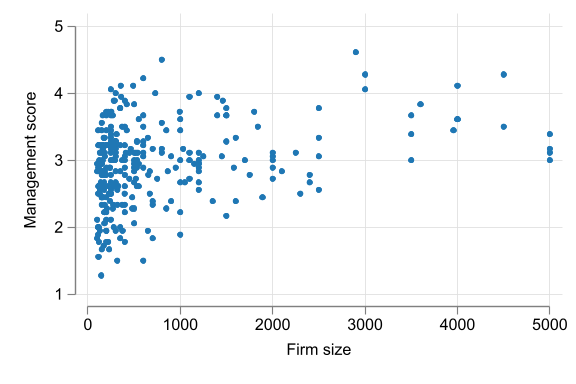

In [18]:
*| echo: true
*| code-fold: true
*| fig-align: center

scatter management emp_firm, xtitle("Firm size") ytitle("Management score") ///
  legend(off) scale(1.5) 

variable emp_firm_bin not found
variable emp_mean_bin not found


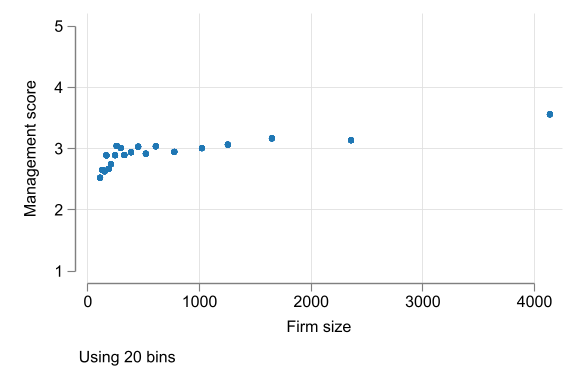

In [19]:
*| echo: true
*| code-fold: true
*| fig-align: center

sort emp_firm
qui:drop2 emp_firm_bin emp_mean_bin
xtile emp_firm_bin = _n, n(20)
bysort emp_firm_bin: egen emp_mean_bin=mean(emp_firm)
bysort emp_firm_bin:egen mean_mng=mean(management)

scatter mean_mng emp_mean_bin, xtitle("Firm size") ytitle("Management score") ///
  scale(1.5) legend(off) ylabel(1/5) ///
  note("Using 20 bins")

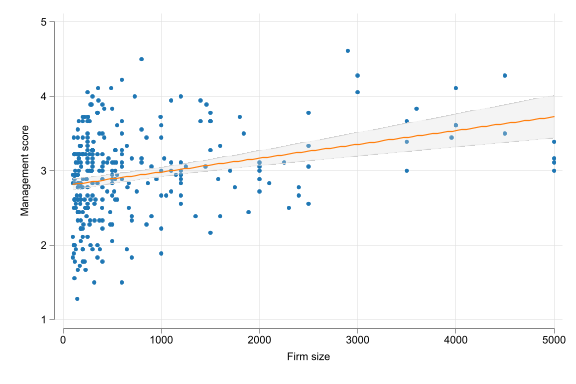

In [20]:
*| echo: true
*| code-fold: true
*| fig-align: center
two (scatter management emp_firm) ///
    (lfitci management emp_firm, fcolor(%30)), ///
    xtitle("Firm size") ytitle("Management score") ///
    legend(off)

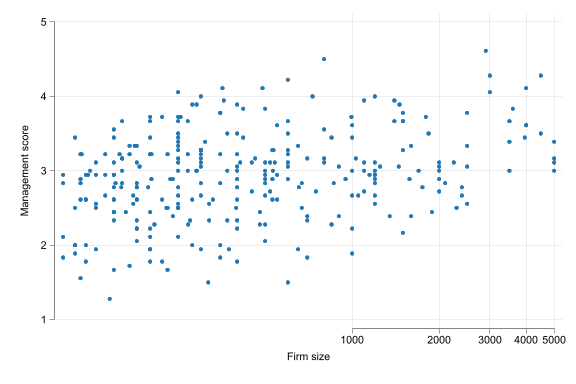

In [21]:
*| echo: true
*| code-fold: true
*| fig-align: center
scatter management emp_firm, ///
  xtitle("Firm size") ytitle("Management score") ///
  xscale(log)

In [22]:
*| echo: true
*| code-fold: false
*| output: false

use "data_slides\wb-mx-management.dta", clear
** Simple mean
egen mng_mean = rowmean(perf* talent* lean*)
** PCA
pca perf* talent* lean*, components(1)
predict mng_pca
label var mng_mean "Management Score (Mean)"
label var mng_pca "Management Score (PCA)"


Principal components/correlation                 Number of obs    =        335
                                                 Number of comp.  =          1
                                                 Trace            =         18
    Rotation: (unrotated = principal)            Rho              =     0.4441

    --------------------------------------------------------------------------
       Component |   Eigenvalue   Difference         Proportion   Cumulative
    -------------+------------------------------------------------------------
           Comp1 |      7.99441      6.74021             0.4441       0.4441
           Comp2 |      1.25421      .310477             0.0697       0.5138
           Comp3 |      .943732     .0811063             0.0524       0.5662
           Comp4 |      .862625     .0181601             0.0479       0.6142
           Comp5 |      .844465      .101068             0.0469       0.6611
           Comp6 |      .743397     .0399787             0.041

     talent5 |   0.2447 
         talent6 |   0.1557 
           lean1 |   0.2724 
           lean2 |   0.2286 
    ------------------------


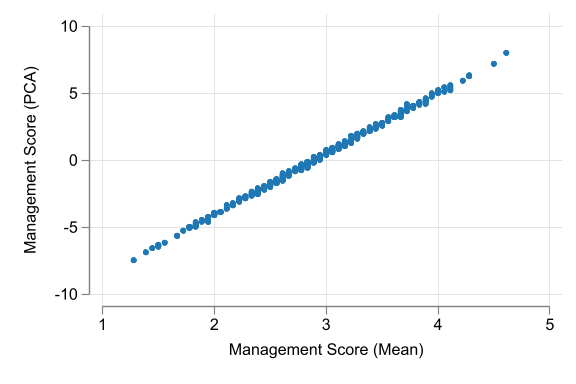

In [23]:
*| echo: false
*| code-fold: true
*| fig-align: center

scatter mng_pca mng_mean , xtitle("Management Score (Mean)") ytitle("Management Score (PCA)") ///
  scale(1.5)